# Подготовка данных

## Библиотеки

In [ ]:
from numpy import arange
from numpy import meshgrid
import matplotlib.pyplot as plt
from numpy import asarray
from numpy.random import rand
from numpy.random import seed
from mpl_toolkits.mplot3d import Axes3D
import time
from math import sqrt

#Настройки
iterations = 100 #Количество итераций для расчёта
seed_num = 1 # seed псевдо-рандом для генератора

In [ ]:
iter_list = arange(1, iterations + 1, 1) #Список значений итераций
seed(seed_num)
bounds = asarray([[-4.0, 4.0], [-4.0, 4.0]]) # Определим границы
print(iter_list)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]


## Графики и данные тестовой функции


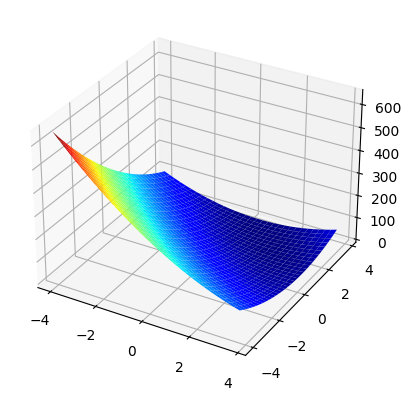

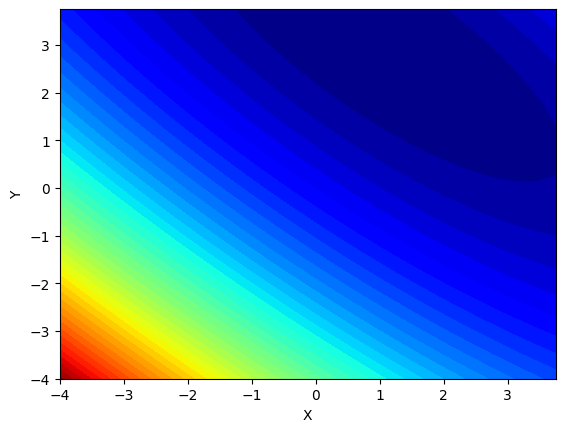

In [ ]:
# Вычисление функции
def objective(x, y):
	return (x + 2*y - 7)**2 + (2*x + y - 5)**2

# ----3D график тестовой функции (функция Бута)---

# Определение диапазона для ввода
r_min, r_max = -4.0, 4.0
# диапазон ввода выборки равномерно с шагом 0,1
xaxis = arange(r_min, r_max, 0.25)
yaxis = arange(r_min, r_max, 0.25)
# создаём сетку из осей
x, y = meshgrid(xaxis, yaxis)
# вычисляем значения
results = objective(x, y)
# создаём график поверхности с цветовой схемой jet
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x, y, results, cmap="jet")
plt.show()

# ---Проекция функции на плоскость XY---

# Определение диапазона для ввода
bounds = asarray([[-4.0, 4.0], [-4.0, 4.0]])
# диапазон ввода выборки равномерно с шагом 0,1
xaxis = arange(bounds[0,0], bounds[0,1], 0.25)
yaxis = arange(bounds[1,0], bounds[1,1], 0.25)
# создаём сетку из осей
x, y = meshgrid(xaxis, yaxis)
#  вычисляем значения
results = objective(x, y)
# Создадим заполненный контурный график с 50 уровнями и цветовой схемой jet
plt.contourf(x, y, results, levels=50, cmap='jet')
plt.xlabel("X")
plt.ylabel('Y')
plt.show()

### Функция и её производная

In [ ]:
# Вычисление функции
def objective(x, y):
	return (x + 2*y - 7)**2 + (2*x + y - 5)**2

# Вычисление частной производной функции
def derivative(x, y):
	return asarray([2*(x + 2*y-7) + 4 * (2 *x + y - 5), 4 * (x + 2* y - 7) + 2 * (2*x+ y -5)])

### Отрисовка графиков

# Градиентный спуск с AdaMax

>0 f([-0.62644388  1.501756  ]) = 43.94475
>1 f([-0.60638309  1.52181552]) = 42.82372
>2 f([-0.58627197  1.54192397]) = 41.71446
>3 f([-0.56612111  1.56207067]) = 40.61765
>4 f([-0.54594106  1.58224493]) = 39.53394
>5 f([-0.52574226  1.60243622]) = 38.46395
>6 f([-0.50553499  1.62263413]) = 37.40824
>7 f([-0.48532926  1.64282857]) = 36.36736
>8 f([-0.46513475  1.66300972]) = 35.34178
>9 f([-0.44496079  1.68316818]) = 34.33195
>10 f([-0.4248163   1.70329492]) = 33.33826
>11 f([-0.40470975  1.72338137]) = 32.36105
>12 f([-0.3846492   1.74341938]) = 31.40063
>13 f([-0.36464223  1.76340129]) = 30.45724
>14 f([-0.34469601  1.78331985]) = 29.53111
>15 f([-0.32481727  1.80316825]) = 28.62240
>16 f([-0.30501231  1.82294011]) = 27.73126
>17 f([-0.28528707  1.84262944]) = 26.85777
>18 f([-0.26564709  1.8622306 ]) = 26.00203
>19 f([-0.24609761  1.88173831]) = 25.16405
>20 f([-0.22664352  1.90114762]) = 24.34386
>21 f([-0.20728944  1.92045384]) = 23.54144
>22 f([-0.18803973  1.93965256]) = 22.7567

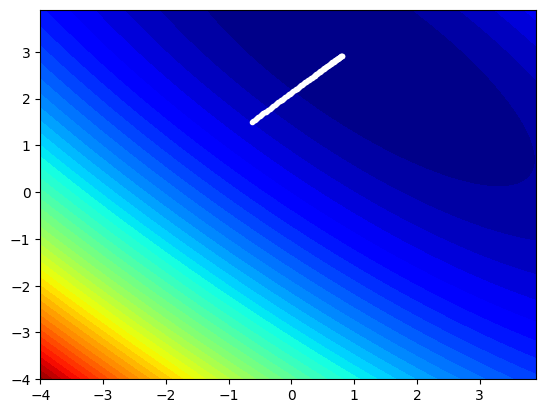

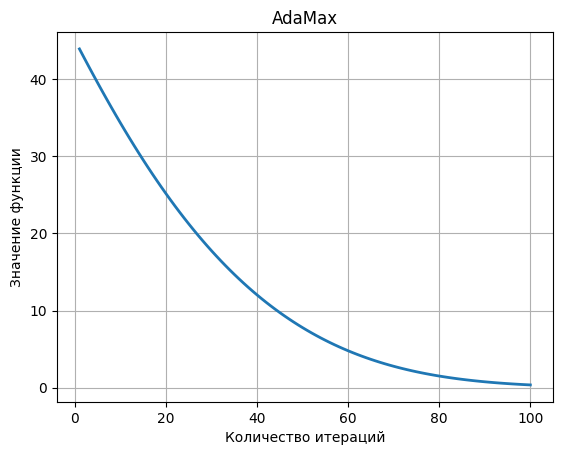

In [ ]:
n_iter = iterations# Кол-во итераций
alpha = 0.02 # Размер шага
beta1 = 0.8 # коэффициент для среднего градиента
beta2 = 0.99 # коэффициент для среднего квадрата градиента
adamax_results = []

def adamax(objective, derivative, bounds, n_iter, alpha, beta1, beta2):
	solutions = list()
	# генерация начальной точки
	x = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# инициализация вектора момента и взвешенную норму бесконечности
	m = [0.0 for _ in range(bounds.shape[0])]
	u = [0.0 for _ in range(bounds.shape[0])]

	for t in range(n_iter):
		# расчёт градиента g(t)
		g = derivative(x[0], x[1])
		#строим решение по одной переменной за раз
		for i in range(x.shape[0]):
			m[i] = beta1 * m[i] + (1.0 - beta1) * g[i]
			u[i] = max(beta2 * u[i], abs(g[i]))
			step_size = alpha / (1.0 - beta1**(t+1))
			delta = m[i] / u[i]
			x[i] = x[i] - step_size * delta

		# Оценка метода
		score = objective(x[0], x[1])
		adamax_results.append(score)
		solutions.append(x.copy())
		# Вывод прогресса
		print('>%d f(%s) = %.5f' % (t, x, score))
	return solutions

start_time = time.time()
# выполним поиск градиентного спуска с помощью adamax
solutions = adamax(objective, derivative, bounds, n_iter, alpha, beta1, beta2)
# диапазон ввода выборки равномерно с шагом 0,1
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
# создаём сетку из оси
x, y = meshgrid(xaxis, yaxis)
# вычисляем значения
results = objective(x, y)

#Построим графики
print("\nВремя расчёта = ", (time.time() - start_time), ' c')
plt.contourf(x, y, results, levels=50, cmap='jet')
solutions = asarray(solutions)
plt.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')
plt.show()

plt.plot(iter_list, adamax_results, linewidth = 2)
plt.grid()
plt.title("AdaMax")
plt.xlabel("Количество итераций")
plt.ylabel('Значение функции')
plt.show()

In [ ]:
print(len(adamax_results))

100


In [ ]:
print(adamax_results)

[43.94475221400323, 42.82372412449723, 41.71446344858969, 40.617652405120936, 39.53394194705609, 38.46394687914021, 37.40824182774922, 36.36735813094934, 35.34178166919304, 34.33195161323398, 33.33826002867316, 32.361052247922345, 31.400627901058115, 30.457242486833465, 29.531109363047314, 28.622402040089632, 27.73125667109243, 26.857774645029536, 26.002025203777762, 25.164048019291737, 24.343855681664945, 23.541436062260352, 22.75675452787505, 21.989755991856544, 21.240366796188212, 20.508496424901722, 19.7940390539268, 19.096874945864855, 18.416871700397877, 17.753885372338416, 17.10776146989205, 16.478335845719553, 15.865435493003192, 15.268879258065368, 14.68847848025765, 14.124037568911659, 13.575354526178984, 13.04222142362746, 12.524424839535715, 12.021746262956487, 11.533962469813082, 11.060845875559231, 10.602164868271316, 10.157684125452551, 9.727164917307876, 9.3103653987913, 8.907040892328947, 8.516944162775566, 8.13982568586447, 7.775433911154714, 7.423515520260791, 7.0838

# Градиентный спуск с RMSProp

>0 f([-0.47527048  3.81872038]) = 4.57096
>1 f([-0.41166965  3.87443644]) = 3.91193
>2 f([-0.36314795  3.91116189]) = 3.50555
>3 f([-0.32331148  3.93629949]) = 3.22692
>4 f([-0.28922921  3.95328335]) = 3.02230
>5 f([-0.25926214  3.96411523]) = 2.86371
>6 f([-0.23238086  3.97013914]) = 2.73502
>7 f([-0.20788867  3.97234325]) = 2.62637
>8 f([-0.18528973  3.97149568]) = 2.53155
>9 f([-0.16421872  3.96821231]) = 2.44651
>10 f([-0.14439977  3.96299416]) = 2.36864
>11 f([-0.12562086  3.95625075]) = 2.29618
>12 f([-0.10771681  3.94831645]) = 2.22797
>13 f([-0.09055755  3.9394633 ]) = 2.16322
>14 f([-0.07403974  3.92991152]) = 2.10139
>15 f([-0.05808062  3.91983848]) = 2.04208
>16 f([-0.04261338  3.90938635]) = 1.98502
>17 f([-0.02758372  3.89866854]) = 1.93001
>18 f([-0.01294714  3.88777512]) = 1.87688
>19 f([1.33306594e-03 3.87677734e+00]) = 1.82550
>20 f([0.01528744 3.86573129]) = 1.77578
>21 f([0.02894156 3.85468094]) = 1.72761
>22 f([0.04231706 3.84366055]) = 1.68092
>23 f([0.05543236 3.8

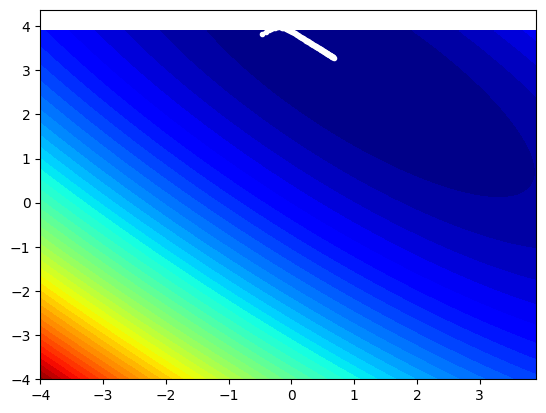

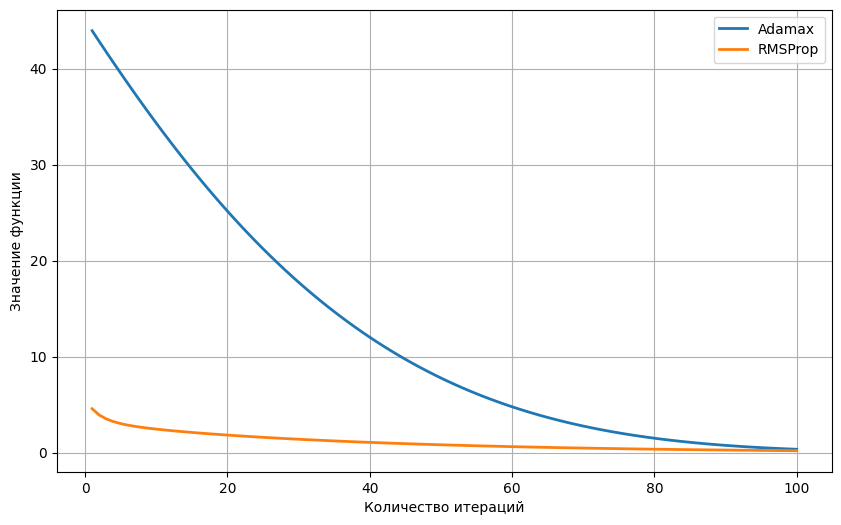

In [ ]:
n_iter = iterations
step_size = 0.01
rho = 0.99
RMSProp_results = []

# градиентный спуск с rmsprop
def rmsprop(objective, derivative, bounds, n_iter, step_size, rho):
	solutions = list()
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	sq_grad_avg = [0.0 for _ in range(bounds.shape[0])]
	for it in range(n_iter):
		gradient = derivative(solution[0], solution[1])
		for i in range(gradient.shape[0]):
			sg = gradient[i]**2.0
			sq_grad_avg[i] = (sq_grad_avg[i] * rho) + (sg * (1.0-rho))
		# нахождение решения
		new_solution = list()
		for i in range(solution.shape[0]):
			alpha = step_size / (1e-8 + sqrt(sq_grad_avg[i]))
			value = solution[i] - alpha * gradient[i]
			new_solution.append(value)
		solution = asarray(new_solution)
		solutions.append(solution)
		solution_eval = objective(solution[0], solution[1])
		RMSProp_results.append(solution_eval)
		print('>%d f(%s) = %.5f' % (it, solution, solution_eval))
	return solutions

start_time = time.time()

solutions = rmsprop(objective, derivative, bounds, n_iter, step_size, rho)
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
x, y = meshgrid(xaxis, yaxis)
results = objective(x, y)
print("\nВремя расчёта = ", (time.time() - start_time), ' c')

#Построим графики
plt.contourf(x, y, results, levels=50, cmap='jet')

solutions = asarray(solutions)
plt.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')
plt.show()

plt.figure(figsize = (10, 6))
plt.plot(iter_list, adamax_results, linewidth = 2, label = 'Adamax')
plt.plot(iter_list, RMSProp_results, linewidth = 2, label = 'RMSProp')
plt.grid()
plt.xlabel("Количество итераций")
plt.ylabel('Значение функции')
plt.legend()
plt.show()

In [ ]:
print(len(RMSProp_results))

100


In [ ]:
print(RMSProp_results)

[4.570958218517881, 3.9119283885647413, 3.5055538783715914, 3.226923153276108, 3.0222995612376495, 2.8637060998164903, 2.7350154341933623, 2.626373027187571, 2.531547200497831, 2.4465143483871223, 2.368640571084231, 2.2961827534948993, 2.2279745062022975, 2.163224934299763, 2.101388567515898, 2.0420809777375277, 1.9850239661706062, 1.9300099366978718, 1.8768787163679417, 1.8255024427593731, 1.7757756748526983, 1.7276088857234182, 1.680924146596284, 1.6356522338037691, 1.5917306628357415, 1.549102329420501, 1.5077145507231167, 1.4675183725602916, 1.4284680554129587, 1.3905206822443186, 1.3536358506604955, 1.3177754246055486, 1.2829033290124088, 1.2489853762076573, 1.2159891163994163, 1.1838837069123778, 1.1526397963897397, 1.122229421228282, 1.0926259122245388, 1.0638038099006395, 1.0357387873216972, 1.0084075794611604, 0.9817879183482062, 0.955858473362986, 0.9305987961455052, 0.9059892696614289, 0.8820110610295362, 0.8586460777652505, 0.8358769271356077, 0.8136868783553164, 0.79205982

# Градиентный спуск с Adadelta

>0 f([1.51718297 3.96858994]) = 10.03573
>1 f([1.50311623 3.95451599]) = 9.66299
>2 f([1.48760556 3.93898296]) = 9.26007
>3 f([1.47142705 3.92276143]) = 8.84878
>4 f([1.45494729 3.90621445]) = 8.43925
>5 f([1.43837457 3.88954797]) = 8.03698
>6 f([1.42183993 3.87289149]) = 7.64521
>7 f([1.4054312  3.85633181]) = 7.26586
>8 f([1.38920965 3.83992957]) = 6.90010
>9 f([1.37321913 3.8237283 ]) = 6.54855
>10 f([1.3574915  3.80775973]) = 6.21152
>11 f([1.34205    3.79204716]) = 5.88904
>12 f([1.32691156 3.77660767]) = 5.58101
>13 f([1.31208826 3.76145366]) = 5.28718
>14 f([1.29758853 3.7465939 ]) = 5.00723
>15 f([1.28341786 3.73203433]) = 4.74077
>16 f([1.26957948 3.71777867]) = 4.48738
>17 f([1.25607476 3.70382882]) = 4.24661
>18 f([1.24290362 3.69018523]) = 4.01798
>19 f([1.23006474 3.67684721]) = 3.80101
>20 f([1.21755585 3.66381308]) = 3.59522
>21 f([1.20537388 3.65108038]) = 3.40014
>22 f([1.1935151  3.63864603]) = 3.21529
>23 f([1.18197524 3.6265064 ]) = 3.04020
>24 f([1.17074963 3.61465

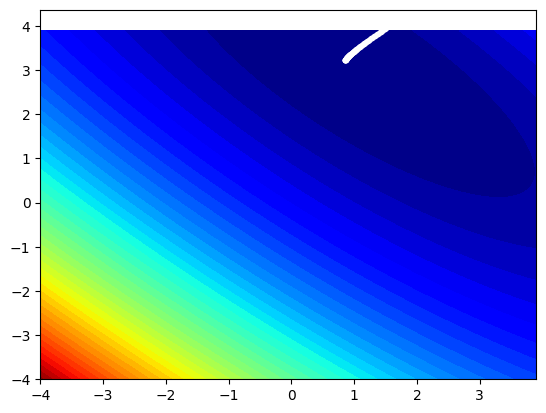

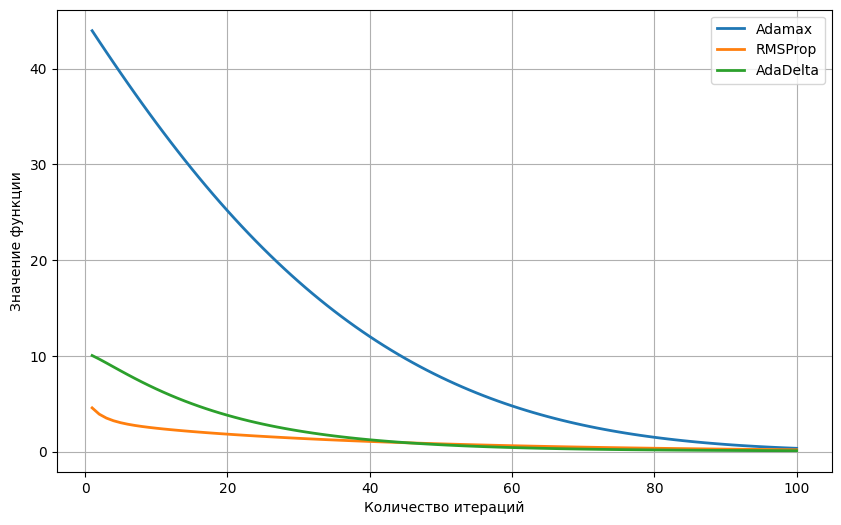

In [ ]:
n_iter = iterations
step_size = 0.01
rho = 0.99
adadelta_results = []

def adadelta(objective, derivative, bounds, n_iter, rho, ep=1e-3):
	# track all solutions
	solutions = list()
	# generate an initial point
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# list of the average square gradients for each variable
	sq_grad_avg = [0.0 for _ in range(bounds.shape[0])]
	# list of the average parameter updates
	sq_para_avg = [0.0 for _ in range(bounds.shape[0])]
	# run the gradient descent
	for it in range(n_iter):
		# calculate gradient
		gradient = derivative(solution[0], solution[1])
		# update the average of the squared partial derivatives
		for i in range(gradient.shape[0]):
			# calculate the squared gradient
			sg = gradient[i]**2.0
			# update the moving average of the squared gradient
			sq_grad_avg[i] = (sq_grad_avg[i] * rho) + (sg * (1.0-rho))
		# build solution
		new_solution = list()
		for i in range(solution.shape[0]):
			# calculate the step size for this variable
			alpha = (ep + sqrt(sq_para_avg[i])) / (ep + sqrt(sq_grad_avg[i]))
			# calculate the change
			change = alpha * gradient[i]
			# update the moving average of squared parameter changes
			sq_para_avg[i] = (sq_para_avg[i] * rho) + (change**2.0 * (1.0-rho))
			# calculate the new position in this variable
			value = solution[i] - change
			# store this variable
			new_solution.append(value)
		# store the new solution
		solution = asarray(new_solution)
		solutions.append(solution)
		# evaluate candidate point
		solution_eval = objective(solution[0], solution[1])
		adadelta_results.append(solution_eval)
		# report progress
		print('>%d f(%s) = %.5f' % (it, solution, solution_eval))
	return solutions

start_time = time.time()
solutions = adadelta(objective, derivative, bounds, n_iter, rho)
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
x, y = meshgrid(xaxis, yaxis)
results = objective(x, y)
print("\nВремя расчёта = ", (time.time() - start_time), ' c')

#Построим графики
plt.contourf(x, y, results, levels=50, cmap='jet')
solutions = asarray(solutions)
plt.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')
plt.show()

plt.figure(figsize = (10, 6))
plt.plot(iter_list, adamax_results, linewidth = 2, label = 'Adamax')
plt.plot(iter_list, RMSProp_results, linewidth = 2, label = 'RMSProp')
plt.plot(iter_list, adadelta_results, linewidth = 2, label = 'AdaDelta')
plt.grid()
plt.xlabel("Количество итераций")
plt.ylabel('Значение функции')
plt.legend()
plt.show()

In [ ]:
print(len(adadelta_results))

100


In [ ]:
print(adadelta_results)

[10.035729222631737, 9.662993440781541, 9.260067405440436, 8.848778087457667, 8.439246779973763, 8.036980948709013, 7.645206317159116, 7.265862185602451, 6.900098693810338, 6.548553404091479, 6.211517609714276, 5.8890423925929625, 5.581009403533207, 5.287179814419563, 5.007229142346123, 4.74077258238968, 4.4873837621427235, 4.246608815648142, 4.017977052008745, 3.8010090992155967, 3.5952231457580632, 3.40013972943834, 3.2152854038358525, 3.040195529362396, 2.8744163761164825, 2.7175066822779086, 2.569038779657344, 2.4285993739344964, 2.2957900488354452, 2.170227549455803, 2.0515438890347033, 1.9393863149396293, 1.8334171628660174, 1.7333136228711616, 1.6387674365400517, 1.5494845410889049, 1.46518467337484, 1.385600944462181, 1.3104793934939132, 1.239578528049407, 1.172668856873369, 1.1095324197859133, 1.0499623186895124, 0.9937622528434668, 0.940746060954496, 0.8907372721122534, 0.8435686671638283, 0.7990818517576544, 0.7571268419831846, 0.7175616632786477, 0.6802519630673576, 0.64507

# Градиентный спуск с Nadam

>0 f([1.99499149 3.34817827]) = 8.32766
>1 f([1.96087637 3.31411033]) = 7.52431
>2 f([1.92751322 3.28083601]) = 6.77958
>3 f([1.89496664 3.24842445]) = 6.09205
>4 f([1.86341146 3.21705679]) = 5.46224
>5 f([1.83299149 3.18688338]) = 4.88938
>6 f([1.80380267 3.15800632]) = 4.37137
>7 f([1.7758989  3.13048506]) = 3.90517
>8 f([1.74930122 3.10434545]) = 3.48719
>9 f([1.72400618 3.079588  ]) = 3.11357
>10 f([1.69999251 3.05619464]) = 2.78042
>11 f([1.67722635 3.03413392]) = 2.48393
>12 f([1.65566523 3.01336501]) = 2.22048
>13 f([1.63526105 2.99384079]) = 1.98667
>14 f([1.61596235 2.97551013]) = 1.77937
>15 f([1.59771595 2.95831966]) = 1.59570
>16 f([1.58046822 2.94221501]) = 1.43307
>17 f([1.56416599 2.92714187]) = 1.28913
>18 f([1.54875718 2.91304662]) = 1.16175
>19 f([1.53419126 2.89987687]) = 1.04905
>20 f([1.52041959 2.88758185]) = 0.94934
>21 f([1.50739557 2.87611262]) = 0.86111
>22 f([1.49507481 2.86542223]) = 0.78304
>23 f([1.48341513 2.85546583]) = 0.71394
>24 f([1.47237661 2.846200

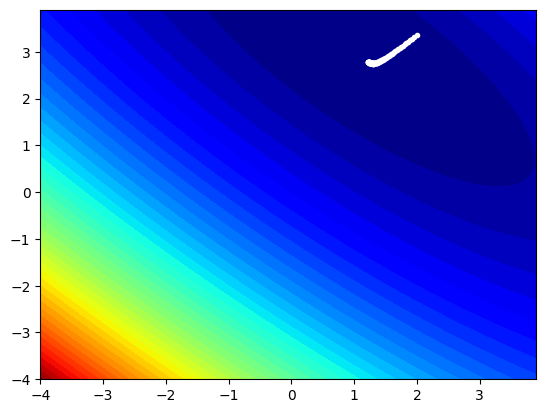

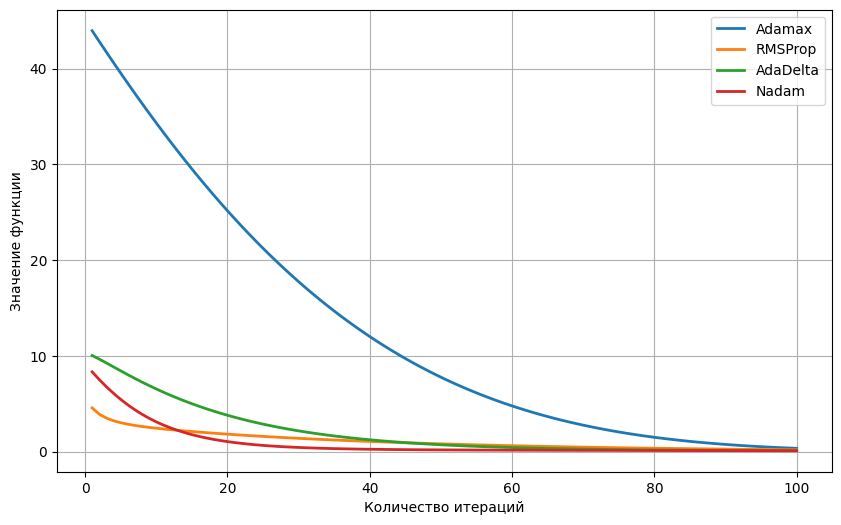

In [ ]:
n_iter = iterations
alpha = 0.02
mu = 0.8
nu = 0.999
nadam_results = []

# градиентный спуск с nadam
def nadam(objective, derivative, bounds, n_iter, alpha, mu, nu, eps=1e-8):
	solutions = list()
	x = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	score = objective(x[0], x[1])
	m = [0.0 for _ in range(bounds.shape[0])]
	n = [0.0 for _ in range(bounds.shape[0])]

	for t in range(n_iter):
		g = derivative(x[0], x[1])
		# нахождение решения
		for i in range(bounds.shape[0]):
			m[i] = mu * m[i] + (1.0 - mu) * g[i]
			n[i] = nu * n[i] + (1.0 - nu) * g[i]**2
			#mhat = (mu * m[i] / (1.0 - mu)) + ((1.0 - mu) * g[i] / (1.0 - mu))
			mhat = (mu * m[i] / (1.0 - mu)) + g[i]
			nhat = nu * n[i] / (1.0 - nu)
			x[i] = x[i] - alpha / (sqrt(nhat) + eps) * mhat
		score = objective(x[0], x[1])
		solutions.append(x.copy())
		nadam_results.append(score)
		print('>%d f(%s) = %.5f' % (t, x, score))
	return solutions

start_time = time.time()

solutions = nadam(objective, derivative, bounds, n_iter, alpha, mu, nu)
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
x, y = meshgrid(xaxis, yaxis)
results = objective(x, y)
print("\nВремя расчёта = ", (time.time() - start_time), ' c')

#Построим графики
plt.contourf(x, y, results, levels=50, cmap='jet')
solutions = asarray(solutions)
plt.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')
plt.show()

plt.figure(figsize = (10, 6))
plt.plot(iter_list, adamax_results, linewidth = 2, label = 'Adamax')
plt.plot(iter_list, RMSProp_results, linewidth = 2, label = 'RMSProp')
plt.plot(iter_list, adadelta_results, linewidth = 2, label = 'AdaDelta')
plt.plot(iter_list, nadam_results, linewidth = 2, label = 'Nadam')
plt.grid()
plt.xlabel("Количество итераций")
plt.ylabel('Значение функции')
plt.legend()
plt.show()

# Градиентный спуск с AMSGrad

>0 f([0.67907417 3.74976599]) = 1.40076
>1 f([0.66574795 3.73638697]) = 1.30084
>2 f([0.64732432 3.71769043]) = 1.17240
>3 f([0.626103   3.69565748]) = 1.03786
>4 f([0.60470707 3.67247322]) = 0.91579
>5 f([0.58537544 3.64993254]) = 0.81581
>6 f([0.5695241  3.62914388]) = 0.73901
>7 f([0.55766589 3.61053814]) = 0.68159
>8 f([0.54963042 3.5940652 ]) = 0.63834
>9 f([0.54485352 3.57943127]) = 0.60469
>10 f([0.54265214 3.56628032]) = 0.57731
>11 f([0.54240851 3.55429208]) = 0.55403
>12 f([0.54363342 3.54321401]) = 0.53352
>13 f([0.54596221 3.53285824]) = 0.51494
>14 f([0.54912741 3.52308707]) = 0.49777
>15 f([0.55293114 3.51379844]) = 0.48167
>16 f([0.55722422 3.50491518]) = 0.46643
>17 f([0.56189196 3.49637767]) = 0.45191
>18 f([0.56684484 3.48813901]) = 0.43800
>19 f([0.57201221 3.48016176]) = 0.42462
>20 f([0.57733782 3.47241569]) = 0.41172
>21 f([0.58277668 3.46487616]) = 0.39927
>22 f([0.58829266 3.45752292]) = 0.38723
>23 f([0.59385665 3.4503392 ]) = 0.37557
>24 f([0.59944521 3.443311

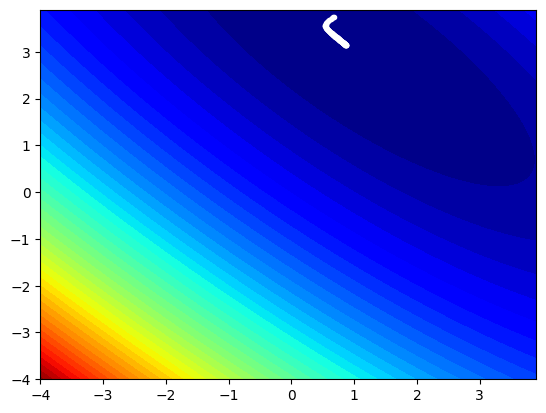

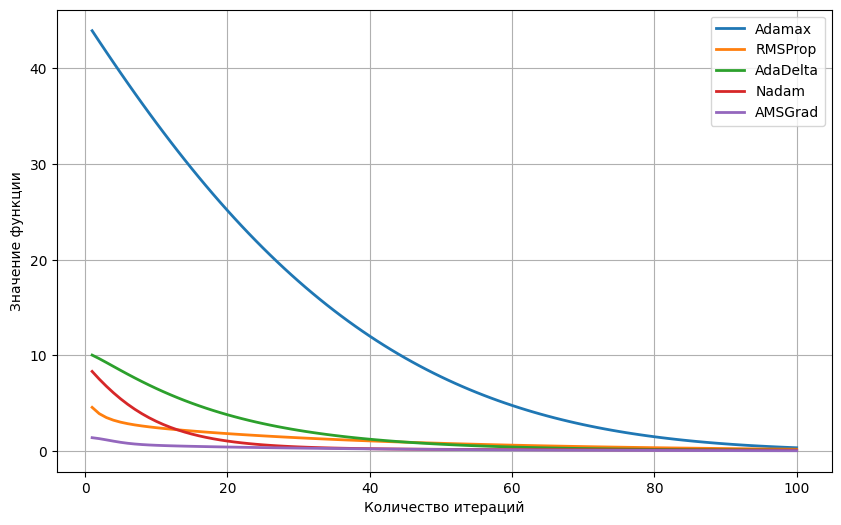

In [ ]:
n_iter = iterations
alpha = 0.007
beta1 = 0.9
beta2 = 0.99
AMSGrad_results = []

# градиентный спуск с amsgrad
def amsgrad(objective, derivative, bounds, n_iter, alpha, beta1, beta2):
	solutions = list()
	x = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	m = [0.0 for _ in range(bounds.shape[0])]
	v = [0.0 for _ in range(bounds.shape[0])]
	vhat = [0.0 for _ in range(bounds.shape[0])]

	for t in range(n_iter):
		g = derivative(x[0], x[1])
		for i in range(x.shape[0]):
			m[i] = beta1**(t+1) * m[i] + (1.0 - beta1**(t+1)) * g[i]
			v[i] = (beta2 * v[i]) + (1.0 - beta2) * g[i]**2
			vhat[i] = max(vhat[i], v[i])
			x[i] = x[i] - alpha * m[i] / (sqrt(vhat[i]) + 1e-8)
		score = objective(x[0], x[1])
		solutions.append(x.copy())
		AMSGrad_results.append(score)
		print('>%d f(%s) = %.5f' % (t, x, score))
	return solutions

start_time = time.time()

solutions = amsgrad(objective, derivative, bounds, n_iter, alpha, beta1, beta2)
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
x, y = meshgrid(xaxis, yaxis)
results = objective(x, y)
print("\nВремя расчёта = ", (time.time() - start_time), ' c')

#Построим графики
plt.contourf(x, y, results, levels=50, cmap='jet')
solutions = asarray(solutions)
plt.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')
plt.show()

plt.figure(figsize = (10, 6))
plt.plot(iter_list, adamax_results, linewidth = 2, label = 'Adamax')
plt.plot(iter_list, RMSProp_results, linewidth = 2, label = 'RMSProp')
plt.plot(iter_list, adadelta_results, linewidth = 2, label = 'AdaDelta')
plt.plot(iter_list, nadam_results, linewidth = 2, label = 'Nadam')
plt.plot(iter_list, AMSGrad_results, linewidth = 2, label = 'AMSGrad')
plt.grid()
plt.xlabel("Количество итераций")
plt.ylabel('Значение функции')
plt.legend()
plt.show()

# Повтор с RMSprop

>0 f([ 0.58824175 -3.75082169]) = 250.95334
>1 f([ 0.65804621 -3.68082444]) = 242.02800
>2 f([ 0.71463619 -3.62397647]) = 234.91443
>3 f([ 0.76339961 -3.5749203 ]) = 228.87281
>4 f([ 0.80684593 -3.53115847]) = 223.55886
>5 f([ 0.84638122 -3.49129087]) = 218.77975
>6 f([ 0.88288587 -3.45444053]) = 214.41484
>7 f([ 0.91695399 -3.42001551]) = 210.38273
>8 f([ 0.94900861 -3.38759423]) = 206.62550
>9 f([ 0.97936354 -3.3568639 ]) = 203.10019
>10 f([ 1.00825911 -3.32758498]) = 199.77392
>11 f([ 1.03588415 -3.29956919]) = 196.62086
>12 f([ 1.06239022 -3.27266542]) = 193.62030
>13 f([ 1.08790113 -3.24675023]) = 190.75530
>14 f([ 1.11251958 -3.22172122]) = 188.01185
>15 f([ 1.13633182 -3.19749235]) = 185.37817
>16 f([ 1.15941117 -3.17399053]) = 182.84423
>17 f([ 1.18182052 -3.15115302]) = 180.40146
>18 f([ 1.20361431 -3.12892552]) = 178.04244
>19 f([ 1.22484004 -3.10726063]) = 175.76067
>20 f([ 1.24553946 -3.08611675]) = 173.55048
>21 f([ 1.26574944 -3.06545705]) = 171.40683
>22 f([ 1.2855028  -

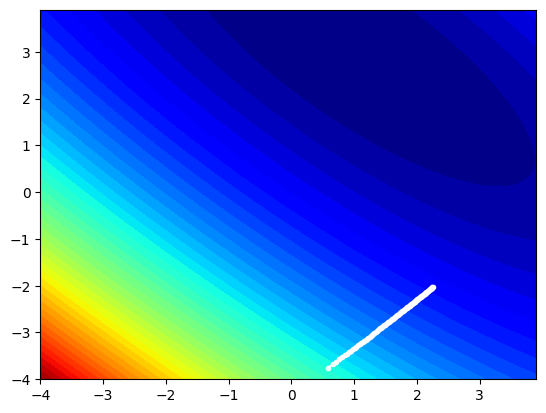

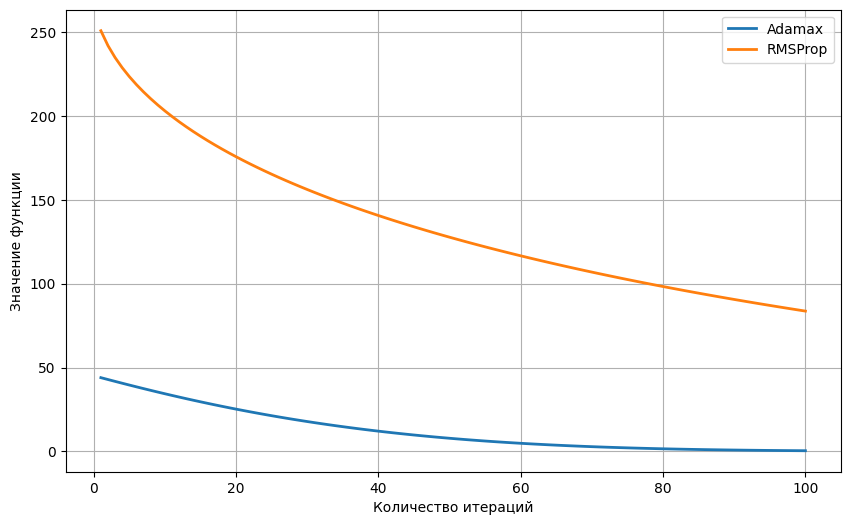

In [ ]:
n_iter = iterations
step_size = 0.01
rho = 0.99
RMSProp_results = []

# градиентный спуск с rmsprop
def rmsprop(objective, derivative, bounds, n_iter, step_size, rho):
	solutions = list()
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	sq_grad_avg = [0.0 for _ in range(bounds.shape[0])]
	for it in range(n_iter):
		gradient = derivative(solution[0], solution[1])
		for i in range(gradient.shape[0]):
			sg = gradient[i]**2.0
			sq_grad_avg[i] = (sq_grad_avg[i] * rho) + (sg * (1.0-rho))
		# нахождение решения
		new_solution = list()
		for i in range(solution.shape[0]):
			alpha = step_size / (1e-8 + sqrt(sq_grad_avg[i]))
			value = solution[i] - alpha * gradient[i]
			new_solution.append(value)
		solution = asarray(new_solution)
		solutions.append(solution)
		solution_eval = objective(solution[0], solution[1])
		RMSProp_results.append(solution_eval)
		print('>%d f(%s) = %.5f' % (it, solution, solution_eval))
	return solutions

start_time = time.time()

solutions = rmsprop(objective, derivative, bounds, n_iter, step_size, rho)
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
x, y = meshgrid(xaxis, yaxis)
results = objective(x, y)
print("\nВремя расчёта = ", (time.time() - start_time), ' c')

#Построим графики
plt.contourf(x, y, results, levels=50, cmap='jet')

solutions = asarray(solutions)
plt.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')
plt.show()

plt.figure(figsize = (10, 6))
plt.plot(iter_list, adamax_results, linewidth = 2, label = 'Adamax')
plt.plot(iter_list, RMSProp_results, linewidth = 2, label = 'RMSProp')
plt.grid()
plt.xlabel("Количество итераций")
plt.ylabel('Значение функции')
plt.legend()
plt.show()